In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
import cv2

In [2]:
Data_path="F:\CVPR PROJECT\Imagedata"
Data_path2="F:\CVPR PROJECT\Test Image"

In [3]:
classes=os.listdir(Data_path)
test_classes=os.listdir(Data_path2)
train_data=[]
test_data=[]

for i,c in enumerate(classes):
    path = os.path.join(Data_path,c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        img_arr = cv2.resize(img_arr,(256,256))
        train_data.append([img_arr,i])
print(len(train_data))

for i,c in enumerate(test_classes):
    path2 = os.path.join(Data_path2,c)
    for img in tqdm(os.listdir(path2)):
        img_arr = cv2.imread(os.path.join(path2,img))
        img_arr = cv2.resize(img_arr,(256,256))
        test_data.append([img_arr,i])
print(len(test_data))

100%|██████████| 11/11 [00:00<00:00, 57.41it/s]


191


100%|██████████| 3/3 [00:00<00:00, 25.19it/s]

12


In [4]:
random.shuffle(train_data)

In [5]:
train_imgs=[]
train_labels=[]
test_imgs=[]
test_labels=[]

for img,label in train_data:
    train_imgs.append(img)
    train_labels.append(label)
    
for img,label in test_data:
    test_imgs.append(img)
    test_labels.append(label)

In [6]:
# @title Default title text
import numpy as np
train_imgs_np = np.array(train_imgs)
train_labels_np = np.array(train_labels)
test_imgs_np = np.array(test_imgs)
test_labels_np = np.array(test_labels)
print(train_imgs_np.shape, train_labels_np.shape,test_imgs_np.shape,test_labels_np.shape)

(191, 256, 256, 3) (191,) (12, 256, 256, 3) (12,)


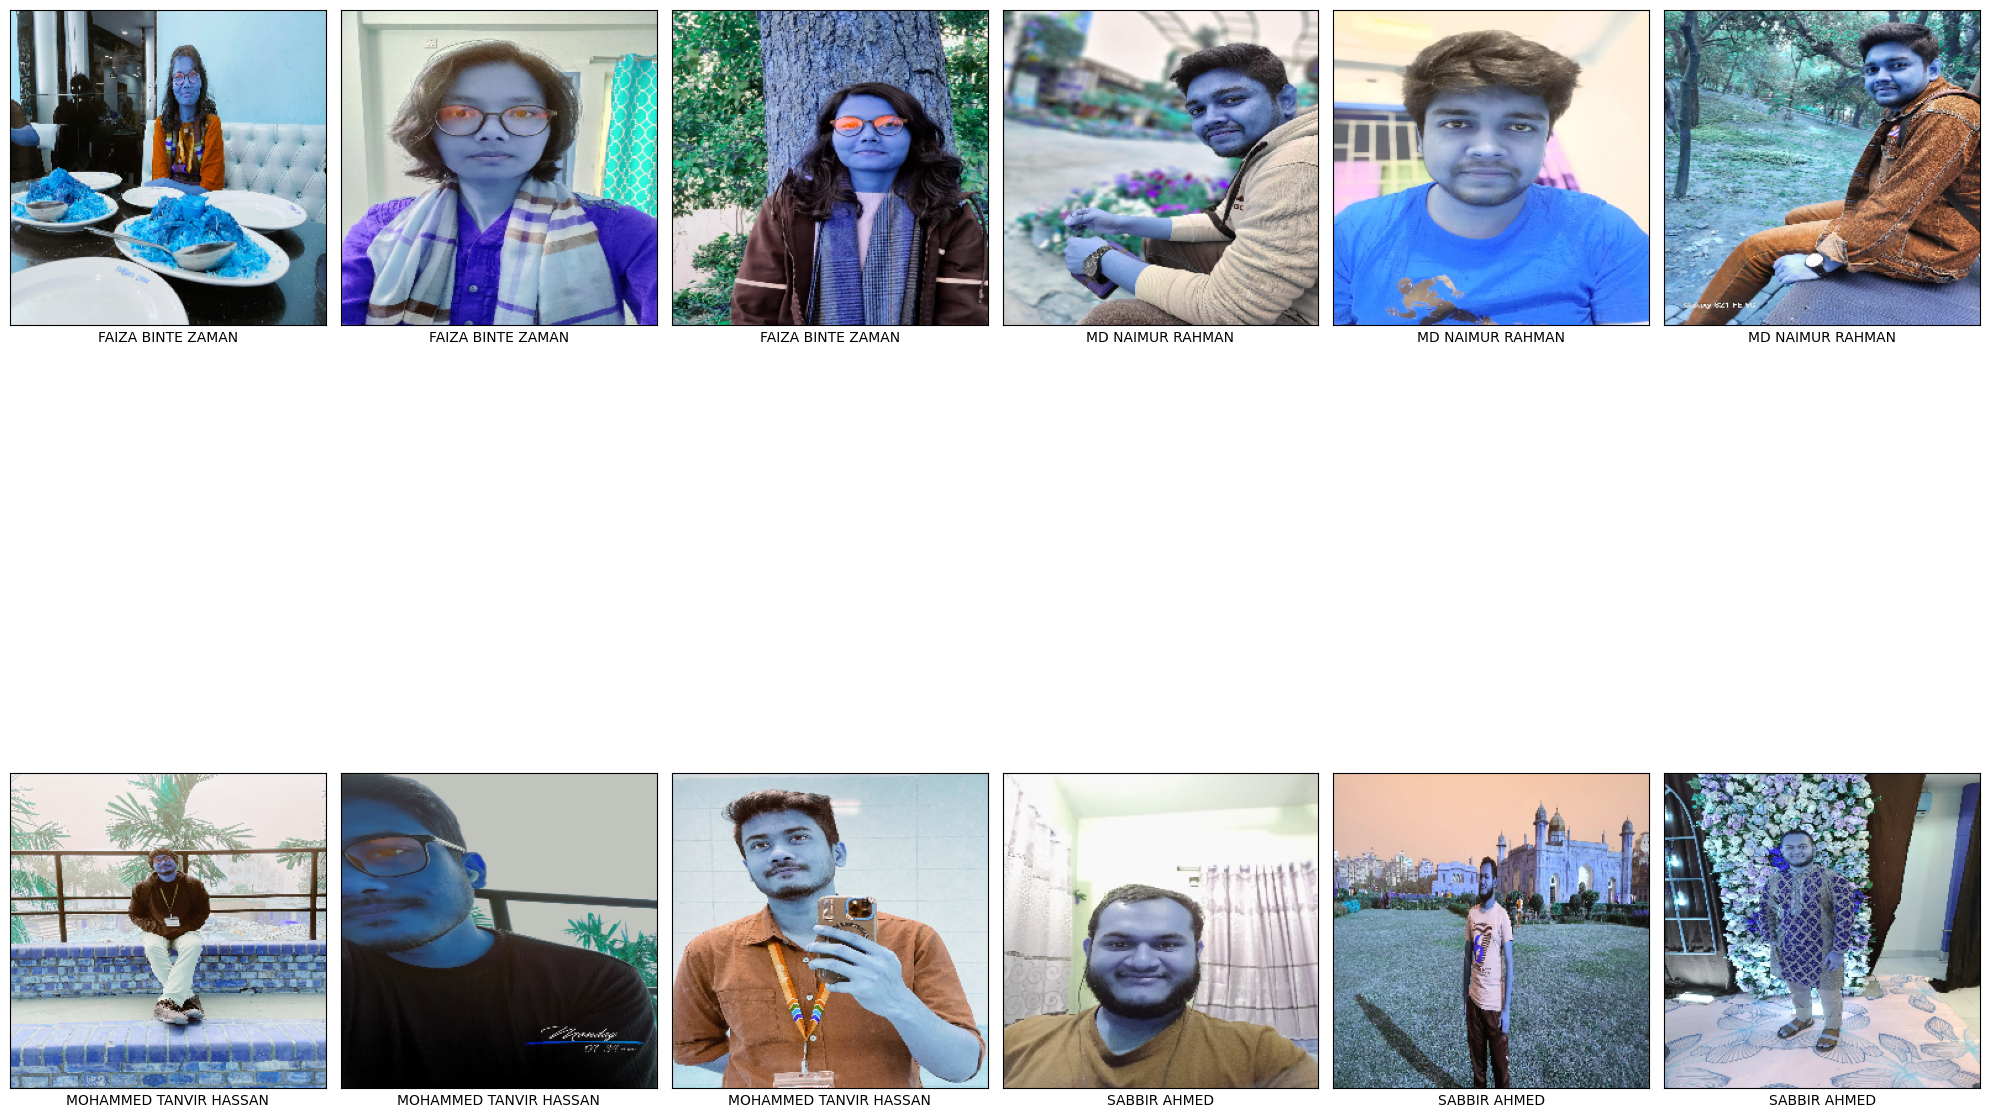

In [7]:
ROWS = 2
COLS = 6
i = 0

plt.figure(figsize=(20,20))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(test_imgs_np[i])
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(test_classes[test_labels_np[i]])
        i += 1
plt.tight_layout()
plt.show() 

In [8]:
train_imgs_np, test_imgs_np = train_imgs_np / 255.0, test_imgs_np / 255.0


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(256, 256, 3)),
    
    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(19, activation='softmax')
])
model.summary()
# Set an appropriate learning rate based on your dataset
learning_rate = 0.001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss='sparse_categorical_crossentropy',  # Assuming your labels are integers
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=train_imgs_np, y=train_labels_np, epochs=100, validation_split=0.2, batch_size=95)

Epoch 1/100
2/2 [==============================] - 45s 18s/step - loss: 3.6405 - accuracy: 0.0592 - val_loss: 3.1406 - val_accuracy: 0.0256
Epoch 2/100
2/2 [==============================] - 2s 705ms/step - loss: 3.0224 - accuracy: 0.0724 - val_loss: 2.9620 - val_accuracy: 0.0256
Epoch 3/100
2/2 [==============================] - 2s 733ms/step - loss: 2.9409 - accuracy: 0.0658 - val_loss: 2.9637 - val_accuracy: 0.0256
Epoch 4/100
2/2 [==============================] - 5s 5s/step - loss: 2.9425 - accuracy: 0.0921 - val_loss: 2.9665 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 1s 393ms/step - loss: 2.9179 - accuracy: 0.1184 - val_loss: 2.9685 - val_accuracy: 0.0256
Epoch 6/100
2/2 [==============================] - 1s 588ms/step - loss: 2.8997 - accuracy: 0.1118 - val_loss: 3.0069 - val_accuracy: 0.0256
Epoch 7/100
2/2 [==============================] - 1s 517ms/step - loss: 2.8703 - accuracy: 0.1316 - val_loss: 3.0186 - val_accuracy: 0.0513
Epoch 8/100
2

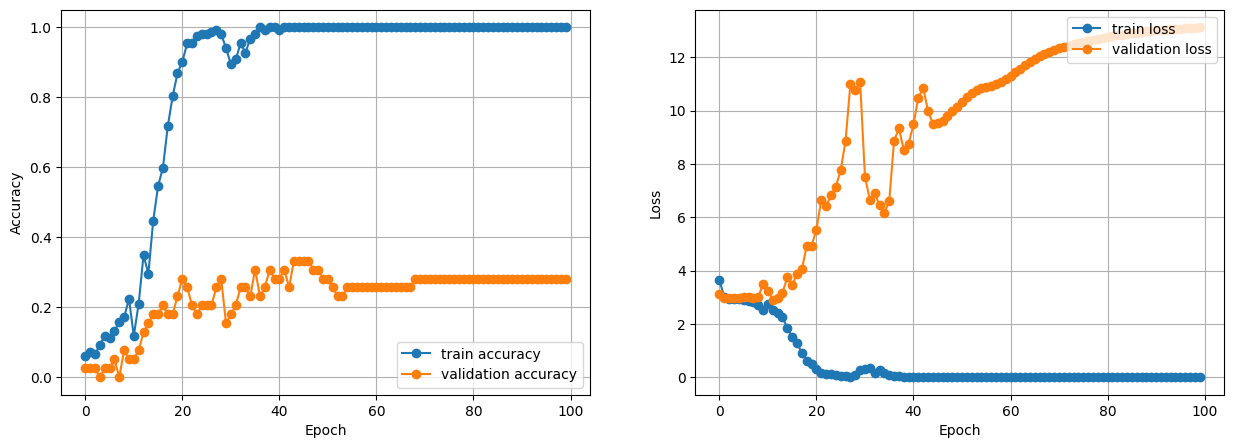

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_imgs_np, test_labels_np)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

1/1 [==============================] - 9s 9s/step - loss: 24.4072 - accuracy: 0.0000e+00

Test Accuracy: 0.0

Test Loss: 24.407182693481445


In [14]:
predictions = model.predict(test_imgs_np)

1/1 [==============================] - 0s 97ms/step


In [15]:
predictions[0]

array([7.5833313e-09, 2.9543515e-18, 1.5078762e-18, 2.2007369e-14,
       8.5310526e-12, 3.8699524e-09, 9.3978373e-13, 7.0523111e-16,
       5.5012182e-11, 4.1327398e-02, 6.2948965e-22, 1.8247180e-11,
       4.7297468e-18, 3.6804828e-14, 3.9768666e-02, 3.6844724e-14,
       1.6123398e-29, 9.1890395e-01, 1.5047764e-14], dtype=float32)

In [16]:
np.argmax(predictions[0])

17

1/1 [==============================] - 0s 22ms/step


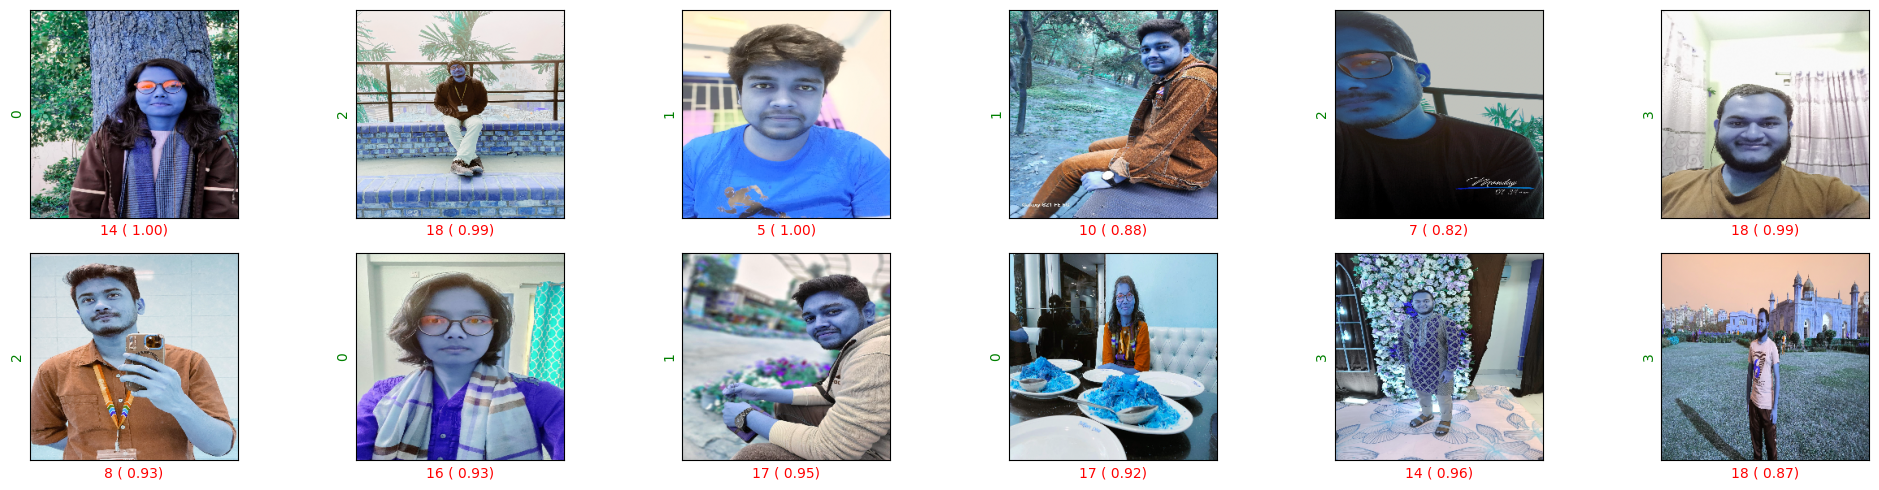

In [17]:
ROWS = 2
COLS = 6

random_indices = random.sample(range(test_imgs_np.shape[0]), ROWS*COLS)
sample_images = test_imgs_np[random_indices, :]
sample_labels = test_labels_np[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(256,256,3), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [18]:
# def test(i):

#     random_indices = random.sample(range(test_imgs_np.shape[0]), ROWS*COLS)
#     sample_images = test_imgs_np[random_indices]
#     sample_labels = test_labels_np[random_indices]
#     predictions = model.predict(sample_images)
#     # img = test_imgs_np[i]
#     # predictions = model.predict([test_imgs_np[i].reshape(-1,11)])

#     plt.figure()
#     plt.imshow(sample_images[i].reshape(32,32,3), cmap=plt.cm.gray)
#     plt.xticks([])
#     plt.yticks([])
#     plt.ylabel(f"True Label: {test_labels_np[i]}", color='g') # ground truth
#     plt.xlabel(test_classes[test_labels_np[i]])
#     prediction = np.argmax(predictions) 
#     # confidence = predictions[0][prediction]

#     if test_labels_np[i] == prediction:
#         plt.xlabel(f"prediction = {prediction} ", color='b')
#     else:
#         plt.xlabel(f"prediction = {prediction} ", color='r')
#     plt.show()

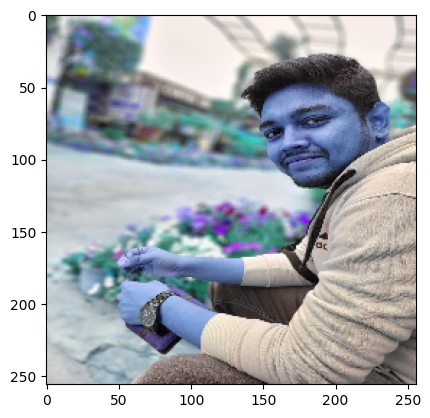

In [19]:
plt.imshow(test_imgs_np[3])

In [20]:
def test2(index_to_test):
    # Assuming ROWS and COLS are defined somewhere in your code
    sample_image = test_imgs_np[index_to_test]
    true_label = test_labels_np[index_to_test]

    # Reshape the image to (1, 32, 32, 3) as expected by the model
    sample_image = sample_image.reshape(1, 256,256, 3)

    # Make predictions for the individual test image
    predictions = model.predict(sample_image)
    prediction = np.argmax(predictions)

    plt.figure()
    plt.imshow(sample_image.reshape(256,256, 3), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(f"True Label: {test_classes[true_label]}", color='g')  # ground truth
    plt.xlabel(test_classes[true_label])

    if true_label == prediction:
        plt.xlabel(f"Prediction = {classes[prediction]} ", color='b')
    else:
        plt.xlabel(f"Prediction = {classes[prediction]} ", color='r')

    plt.show()

1/1 [==============================] - 1s 715ms/step


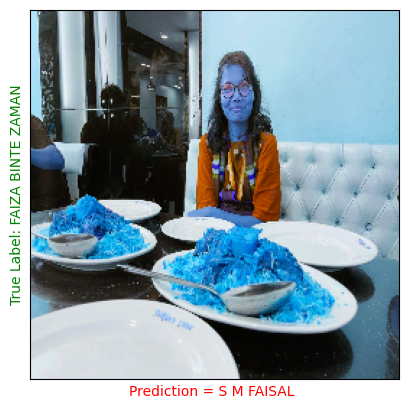

1/1 [==============================] - 0s 20ms/step


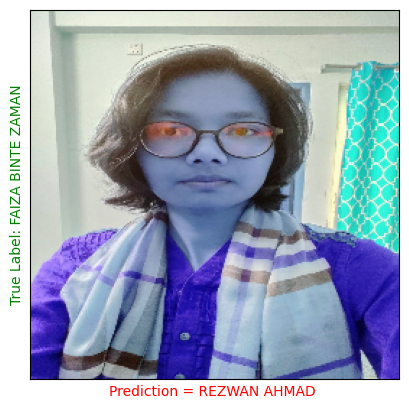

1/1 [==============================] - 0s 17ms/step


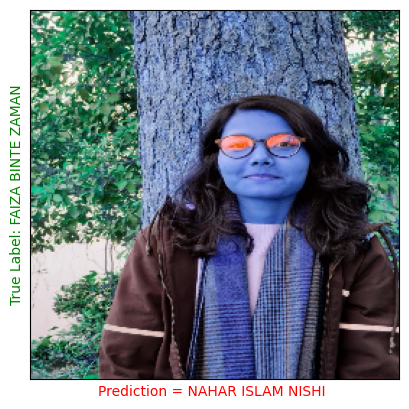

1/1 [==============================] - 0s 17ms/step


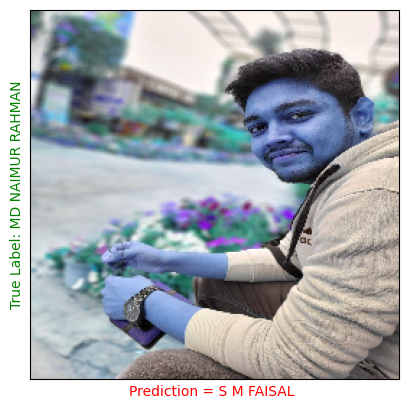

1/1 [==============================] - 0s 20ms/step


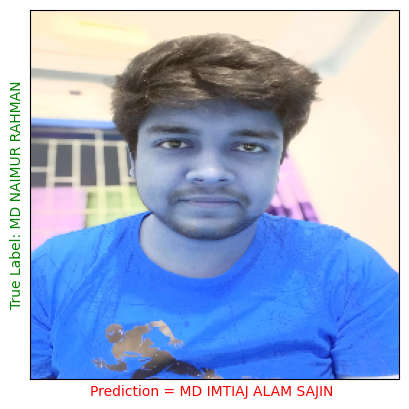

1/1 [==============================] - 0s 18ms/step


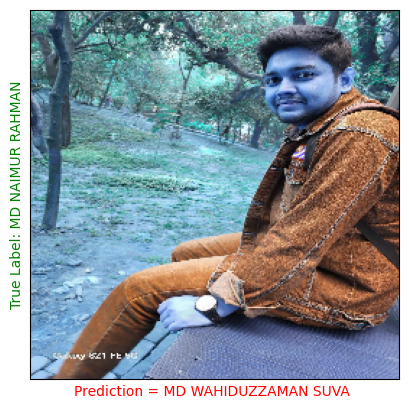

1/1 [==============================] - 0s 17ms/step


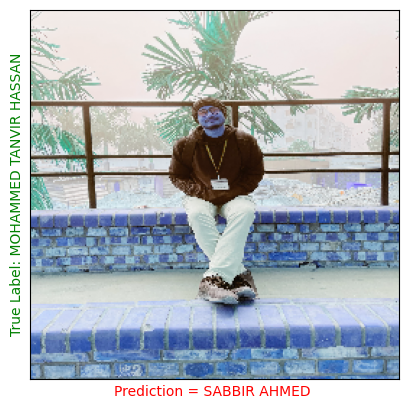

1/1 [==============================] - 0s 18ms/step


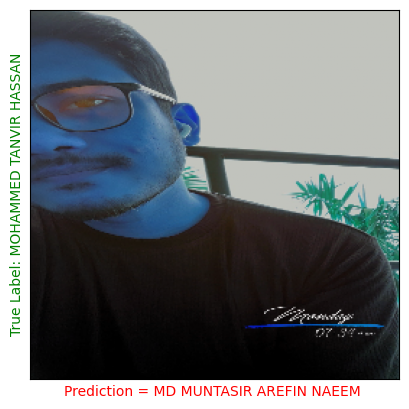

1/1 [==============================] - 0s 18ms/step


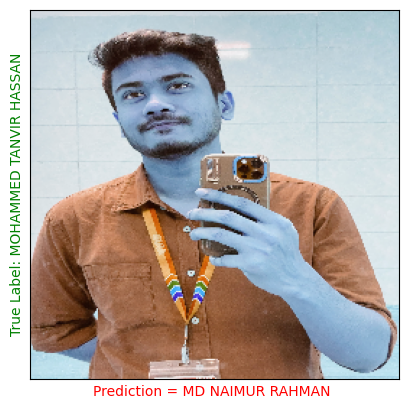

1/1 [==============================] - 0s 17ms/step


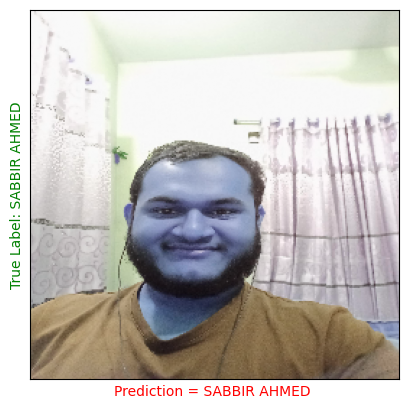

1/1 [==============================] - 0s 17ms/step


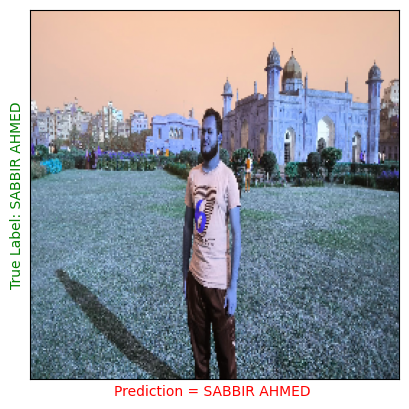

1/1 [==============================] - 0s 22ms/step


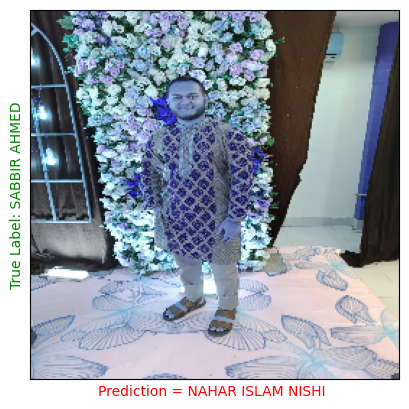

In [21]:
for i in range(12):
    test2(i)